In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import spacy
import seaborn as sns
#%pip install spacy


<span style="color:red;font-weight:bold;font-size:larger;">Explication :</span>  

Les deux premières lignes importent les bibliothèques `numpy` et `pandas`, qui sont largement utilisées pour la manipulation et l'analyse des données en Python. La troisième ligne importe `matplotlib.pyplot` pour créer des visualisations graphiques. La quatrième ligne utilise l'outil `pip` pour installer la bibliothèque `spacy`. Nous l'importons afin de l'utiliser ultérieurement dans la quatrième question pour calculer la similarité entre des phrases.

In [2]:
if not spacy.util.is_package("en_core_web_md"):
    # Install the model
    spacy.cli.download("en_core_web_md")
    
# Load the installed model
nlp = spacy.load("en_core_web_md")

<span style="color:red;font-weight:bold;font-size:larger;">Explication :</span> 

Ces lignes de code ont été utilisées pour identifier des contenus similaires en faisant correspondre des caractéristiques textuelles. Elles vérifient d'abord si le modèle linguistique `en_core_web_md` est installé, et si ce n'est pas le cas, le télécharge. Ensuite, le modèle est chargé, ce qui permet d'exploiter ses fonctionnalités pour le traitement et l'analyse de texte, notamment pour calculer la similarité entre des phrases. Ainsi, ces étapes préparent l'environnement en s'assurant que les ressources nécessaires sont disponibles pour effectuer cette tâche spécifique de correspondance textuelle.

In [3]:
df = pd.read_csv("C:\\Users\\Administrateur\\Desktop\\Amazon-Analysis-Project\\amazon.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


<span style="color:red;font-weight:bold;font-size:larger;">Explication :</span> 

Ces lignes de code chargent un fichier `CSV` situé dans le chemin "C:\Users\Administrateur\Desktop\Amazon-Analysis-Project\amazon.csv" et le stockent dans un DataFrame appelé "df" à l'aide de la fonction "pd.read_csv()". Ensuite, la méthode "head(5)" est utilisée pour afficher les cinq premières lignes du DataFrame, ce qui permet d'avoir un aperçu des données et de vérifier si elles ont été chargées correctement.

In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2082
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

<span style="color:red;font-weight:bold;font-size:larger;">Explication :</span> 
La ligne de code df.isnull() vérifie si chaque valeur dans le DataFrame df est nulle ou non, renvoyant un DataFrame de booléens avec la même taille. Ensuite, la méthode sum() est utilisée pour calculer la somme de chaque colonne, fournissant ainsi le nombre de valeurs nulles dans chaque colonne de df.

In [5]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

<span style="color:red;font-weight:bold;font-size:larger;">Explication :</span>

La ligne de code df.dtypes renvoie le type de données de chaque colonne dans le DataFrame df. Cela permet de vérifier le type de données de chaque variable et de s'assurer qu'elles sont correctement définies pour les analyses ultérieures.

In [6]:
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9663,False,False,False,False,False,True,True,False,False,False,False,False
9664,False,False,False,True,False,True,True,False,False,False,False,False
9665,False,False,False,False,False,True,True,False,False,False,False,False
9666,False,False,False,True,False,True,True,False,False,False,False,False


<span style="color:red;font-weight:bold;font-size:larger;">Explication :</span> 

La ligne de code df.isnull() renvoie un DataFrame contenant des valeurs booléennes, où chaque cellule est True si la valeur correspondante dans le DataFrame df est nulle (NaN) et False sinon. Cela permet de vérifier la présence de valeurs manquantes dans le DataFrame.

In [7]:
# top 5 meilleurs catégories

top_five_category = df["listed_in"].value_counts().head(5)
top_five_category

Drama              986
Comedy             536
Drama, Suspense    399
Comedy, Drama      377
Animation, Kids    356
Name: listed_in, dtype: int64

<span style="color:red;font-weight:bold;font-size:larger;">Explication :</span> 

La variable top_five_category contient les cinq meilleures catégories de contenu les plus fréquentes dans la colonne "listed_in" du DataFrame df. La méthode value_counts() compte le nombre d'occurrences de chaque catégorie, puis la méthode head(5) sélectionne les cinq premières catégories les plus fréquentes.

In [8]:
# Top 5 des réalisateurs

top_five_director = df["director"].value_counts().head(5)
top_five_director  

Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Name: director, dtype: int64

<span style="color:red;font-weight:bold;font-size:larger;">Explication :</span> 

La variable top_five_director contient les cinq réalisateurs les plus fréquents dans la colonne "director" du DataFrame df. La méthode value_counts() compte le nombre d'occurrences de chaque réalisateur, puis la méthode head(5) sélectionne les cinq réalisateurs les plus fréquents.

In [9]:
# Les dix meilleurs acteurs

top_ten_actors = df['cast'].str.split(',')
top_ten_actors.explode().value_counts().head(10)


Maggie Binkley        56
1                     35
Gene Autry            32
 Nassar               30
 Champion             29
Anne-Marie Newland    25
 Prakash Raj          23
Roy Rogers            23
Cassandra Peterson    22
John Wayne            21
Name: cast, dtype: int64

<span style="color:red;font-weight:bold;font-size:larger;">Explication :</span>

La variable top_ten_actors contient une série de listes d'acteurs pour chaque entrée dans la colonne "cast" du DataFrame df. En utilisant la méthode str.split(','), les noms d'acteurs sont séparés en listes. Ensuite, la méthode explode() est utilisée pour transformer la série de listes en une série individuelle avec un acteur par ligne. La méthode value_counts() compte le nombre d'occurrences de chaque acteur, et enfin, la méthode head(10) sélectionne les dix acteurs les plus fréquents. Ainsi, top_ten_actors représente les dix acteurs les plus populaires dans le dataset.

In [10]:
# Les cinq meilleures séries télévisées avec le plus grand nombre de saisons.

tv_shows = df[df['type'] == 'TV Show']
tv_shows.sort_values(by='duration', ascending=False).head(5)[['duration', 'type']]

,duration,type
800,9 Seasons,TV Show
185,9 Seasons,TV Show
1081,9 Seasons,TV Show
3571,9 Seasons,TV Show
867,9 Seasons,TV Show


<span style="color:red;font-weight:bold;font-size:larger;">Explication :</span> 

La variable tv_shows est créée en filtrant le DataFrame df pour ne contenir que les entrées de type 'TV Show'. Ensuite, les données sont triées par la colonne 'duration' de manière décroissante en utilisant la méthode sort_values(). La méthode head(5) sélectionne les cinq premières lignes, correspondant aux séries télévisées avec le plus grand nombre de saisons. Enfin, les colonnes 'duration' et 'type' sont extraites en utilisant la notation avec les crochets pour obtenir les informations sur la durée et le type des séries télévisées. Ainsi, la sortie représente les cinq meilleures séries télévisées avec le plus grand nombre de saisons, affichant la durée et le type de chaque série.

In [11]:
df["type"].value_counts()

Movie      7814
TV Show    1854
Name: type, dtype: int64

<span style="color:red;font-weight:bold;font-size:larger;">Explication :</span> 

La ligne de code df["type"].value_counts() retourne le décompte du nombre d'occurrences de chaque valeur dans la colonne "type" du DataFrame df. Elle renvoie une série qui affiche le nombre de films et de séries télévisées présents dans le jeu de données, en les regroupant par type. Ainsi, on obtient le nombre total de films et de séries télévisées dans le DataFrame.

In [12]:
# Identifier des contenus similaires en faisant correspondre des caractéristiques textuelles

processed_texts = []
for text in df['description']:
    doc = nlp(text)
    processed_texts.append(doc)
df['processed_text_column'] = processed_texts
df['processed_text_column']

0       (A, small, fishing, village, must, procure, a,...
1       (A, Metro, Family, decides, to, fight, a, Cybe...
2       (After, a, man, discovers, his, wife, is, chea...
3       (Pink, breaks, the, mold, once, again, ,, brin...
4       (Teenage, Matt, Banting, wants, to, work, with...
                              ...                        
9663    (New, York, City, street, principles, get, an,...
9664    (This, is, Earth, ,, 2100AD, -, and, these, ar...
9665    (In, war, -, torn, Eastern, Europe, ,, a, worl...
9666    (The, series, tells, the, story, of, Diego, Ma...
9667    (Harry, Brown, ,, starring, two, -, time, Acad...
Name: processed_text_column, Length: 9668, dtype: object

<span style="color:red;font-weight:bold;font-size:larger;">Explication :</span> 

Dans ce code, nous itérons à travers la colonne 'description' du DataFrame df et traitons chaque texte en utilisant la bibliothèque spaCy. Pour chaque texte, nous créons un objet doc en utilisant la méthode nlp(text) qui effectue le traitement linguistique sur le texte. Le traitement consiste à analyser et à segmenter chaque texte en mots, en identifiant les entités nommées, en lemmatisant les mots, en détectant les phrases, etc. Ensuite, nous ajoutons l'objet doc à la liste processed_texts.
 
Après, nous créons une nouvelle colonne 'processed_text_column' dans le DataFrame df et lui attribuons les valeurs de la liste processed_texts. Cette colonne contient les objets spaCy représentant les textes prétraités.

Le dernier appel à df['processed_text_column'] affiche le contenu de cette colonne dans le DataFrame.

In [13]:
similarityValue = []
reference_doc = processed_texts[0]  # Assuming the first document is the reference

for doc in processed_texts[0:]:
    similarity = reference_doc.similarity(doc)
    similarityValue.append(similarity)

# Create a new column 'Similarity' in the DataFrame and assign the similarity values
df['Similarity'] = similarityValue
df[["processed_text_column", "Similarity"]]

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_10708\3616034610.py:5: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  similarity = reference_doc.similarity(doc)


,processed_text_column,Similarity
0,"(A, small, fishing, village, must, procure, a,...",1.000000
1,"(A, Metro, Family, decides, to, fight, a, Cybe...",0.870618
2,"(After, a, man, discovers, his, wife, is, chea...",0.825046
3,"(Pink, breaks, the, mold, once, again, ,, brin...",0.927712
4,"(Teenage, Matt, Banting, wants, to, work, with...",0.909972
...,...,...
9663,"(New, York, City, street, principles, get, an,...",0.717157
9664,"(This, is, Earth, ,, 2100AD, -, and, these, ar...",0.800734
9665,"(In, war, -, torn, Eastern, Europe, ,, a, worl...",0.766100
9666,"(The, series, tells, the, story, of, Diego, Ma...",0.819886


<span style="color:red;font-weight:bold;font-size:larger;">Explication :</span> 

Dans le code ci-dessus, nous avons calculé les valeurs de similarité entre chaque texte de la colonne 'processed_text_column' et un texte de référence (dans ce cas, le premier texte).

Nous avons créé une liste vide 'similarityValue' pour stocker les valeurs de similarité. Ensuite, à l'aide d'une boucle, nous avons itéré sur chaque document prétraité et calculé la similarité entre le texte de référence et le document actuel à l'aide de la méthode 'similarity' de spaCy.

Les valeurs de similarité ont été ajoutées à la liste 'similarityValue'. Enfin, nous avons créé une nouvelle colonne 'Similarity' dans le DataFrame et lui avons assigné les valeurs de similarité correspondantes. En affichant les colonnes 'processed_text_column' et 'Similarity' du DataFrame, vous pouvez voir les textes prétraités et leurs valeurs de similarité respectives par rapport au texte de référence.

`Si la valeur de similarité est proche de 1, cela indique que les deux textes sont similaires ou ont des caractéristiques textuelles communes. Plus la valeur de similarité est élevée, plus les textes sont considérés comme étant similaires.`

In [14]:
# Netflix/Amazon/Disney se concentre-t-il davantage sur les séries télévisées que sur les films ces dernières années ?

recent_years = df[df['release_year'] >= 2019] 

tv_show_count = recent_years[recent_years['type'] == 'TV Show'].shape[0]
movie_count = recent_years[recent_years['type'] == 'Movie'].shape[0]

if tv_show_count > movie_count:
    print("Amazon focuses more on TV shows in recent years.")
else:
    print("Amazon focuses more on movies in recent years.")

#df["type"].value_counts()


Amazon focuses more on movies in recent years.


<span style="color:red;font-weight:bold;font-size:larger;">Explication :</span> 

Pour déterminer si Amazon se concentre davantage sur les séries télévisées que sur les films ces dernières années, nous avons filtré les données pour ne conserver que les enregistrements des années 2019 et ultérieures. Ensuite, nous avons compté le nombre de séries télévisées (TV Show) et de films (Movies) dans cet ensemble de données récent. Si le nombre de séries télévisées est supérieur au nombre de films, cela indique que Amazon se concentre davantage sur les séries télévisées. Sinon, cela signifie qu'ils se concentrent davantage sur les films.

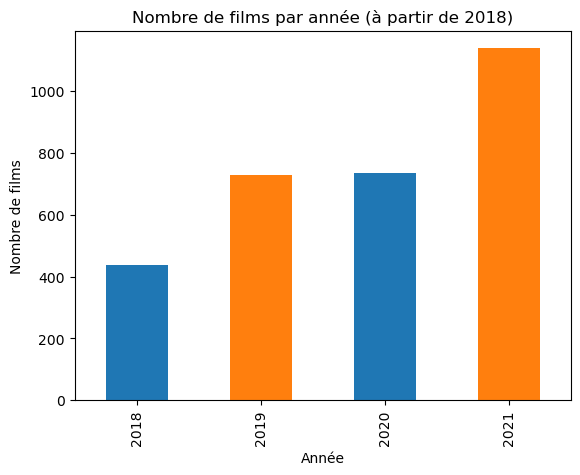

In [15]:
# Comment le nombre de films varie-t-il en fonction de release year?

data_movies = df[(df['release_year'] >= 2018) & (df['type'] == 'Movie')]['release_year'].value_counts().sort_index()
# Créer le graphique à barres
data_movies.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
# Ajouter des labels et un titre
plt.xlabel('Année')
plt.ylabel('Nombre de films')
plt.title('Nombre de films par année (à partir de 2018)')
# Afficher le graphique
plt.show()


<span style="color:red;font-weight:bold;font-size:larger;">Explication :</span> 

Le code en haut permet de créer un graphique à barres montrant le nombre de films par année à partir de 2018. Les données sont extraites du DataFrame df en filtrant les enregistrements avec l'année de sortie supérieure ou égale à 2018 et le type qui est ' film'. Ensuite, les valeurs sont comptées et triées par année. Le graphique est créé en utilisant la fonction plot avec le paramètre kind défini sur "bar" et les couleurs spécifiées. Les axes x et y sont étiquetés, et un titre est ajouté. Enfin, le graphique est affiché en utilisant plt.show().

En observant le graphique à barres, on constate une tendance croissante dans le nombre de films depuis l'année 2018 jusqu'à 2021. Cela suggère une augmentation de la production cinématographique au cours de ces dernières années.

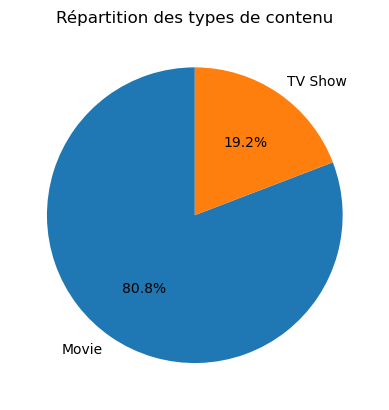

In [17]:
type_counts = df["type"].value_counts()
# Créer le graphique circulaire
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)

# Ajouter un titre
plt.title("Répartition des types de contenu")

# Afficher le graphique
plt.show()

<span style="color:red;font-weight:bold;font-size:larger;">Explication :</span> 

Ce code crée un graphique circulaire qui représente la répartition des types de contenu dans le dataframe. La fonction plt.pie prend en entrée les valeurs de décompte de chaque type de contenu (obtenues avec df["type"].value_counts()), les labels correspondants (les types de contenu), le formatage du pourcentage (autopct='%1.1f%%' pour afficher un chiffre avec une décimale) et l'angle de départ du graphique (90 degrés dans ce cas). La fonction plt.title ajoute un titre au graphique. Enfin, plt.show() affiche le graphique. Cela permet de visualiser facilement la répartition relative des types de contenu, en montrant la proportion de chaque type sous forme de pourcentage.

En observant le diagramme circulaire, nous constatons que les films représentent une grande majorité par rapport aux séries télévisées. En effet, les films occupent une part plus importante dans la répartition des types de contenu

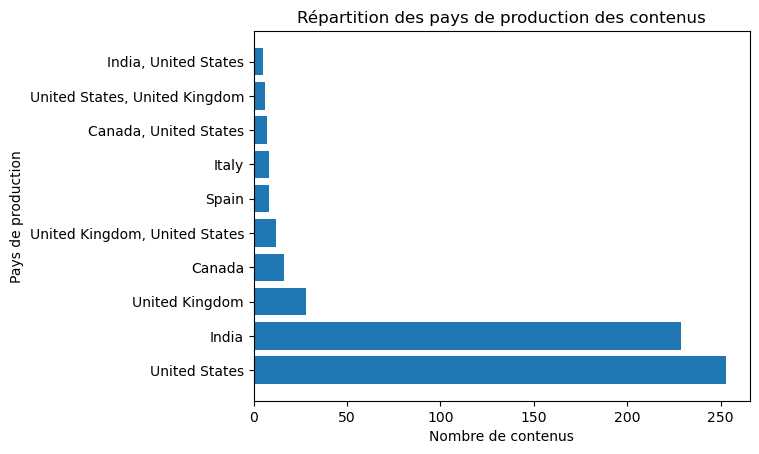

In [18]:
country_counts = df['country'].value_counts().head(10)
plt.barh(country_counts.index, country_counts.values)
plt.xlabel('Nombre de contenus')
plt.ylabel('Pays de production')
plt.title('Répartition des pays de production des contenus')
plt.show()


<span style="color:red;font-weight:bold;font-size:larger;">Explication :</span> 

Ce code crée un graphique à barres horizontales pour représenter la répartition des pays de production des contenus. Les pays sont affichés sur l'axe des ordonnées et le nombre de contenus produits est affiché sur l'axe des abscisses.

En observant le graphique, on peut constater que les États-Unis (United States) produisent un nombre considérable de contenus par rapport aux autres pays. Ils sont en tête de liste avec un nombre significatif de contenus, ce qui indique leur forte contribution à l'industrie du divertissement.